In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
# Define key parameters
strike_price = 3000  # Strike price for the everlasting option
index_price = np.arange(2750.0, 3250.0, 10.0)  # Range of index prices to simulate

# Simulate mark prices
# In reality, mark prices would be determined by market forces
# Here, we're adding some random noise to the index price to simulate market fluctuations
mark_price = index_price + np.random.normal(0, 20, index_price.shape)

# Standard Perpetual Futures calculations
perp_funding_fees = mark_price - index_price  # Funding fee for standard perps

# Create DataFrame for standard perpetual futures
perp = pd.DataFrame(
    {
        "index_price": index_price,
        "mark_price": mark_price,
        "funding_fees": perp_funding_fees,
    }
)

# Everlasting Option calculations
# Assuming a PUT option: payoff is max(strike_price - index_price, 0)
mark_price = index_price + np.random.normal(0, 20, index_price.shape)
ev_option_payoff = np.maximum(strike_price - index_price, 0)

# Funding fee for everlasting option
# As per the paper: funding fee = mark_price - option_payoff
ev_option_funding_fees = mark_price - ev_option_payoff

# Create DataFrame for everlasting option
ev_option = pd.DataFrame(
    {
        "strike_price": strike_price,
        "index_price": index_price,
        "mark_price": mark_price,
        "option_payoff": ev_option_payoff,
        "funding_fees": ev_option_funding_fees,
    }
)

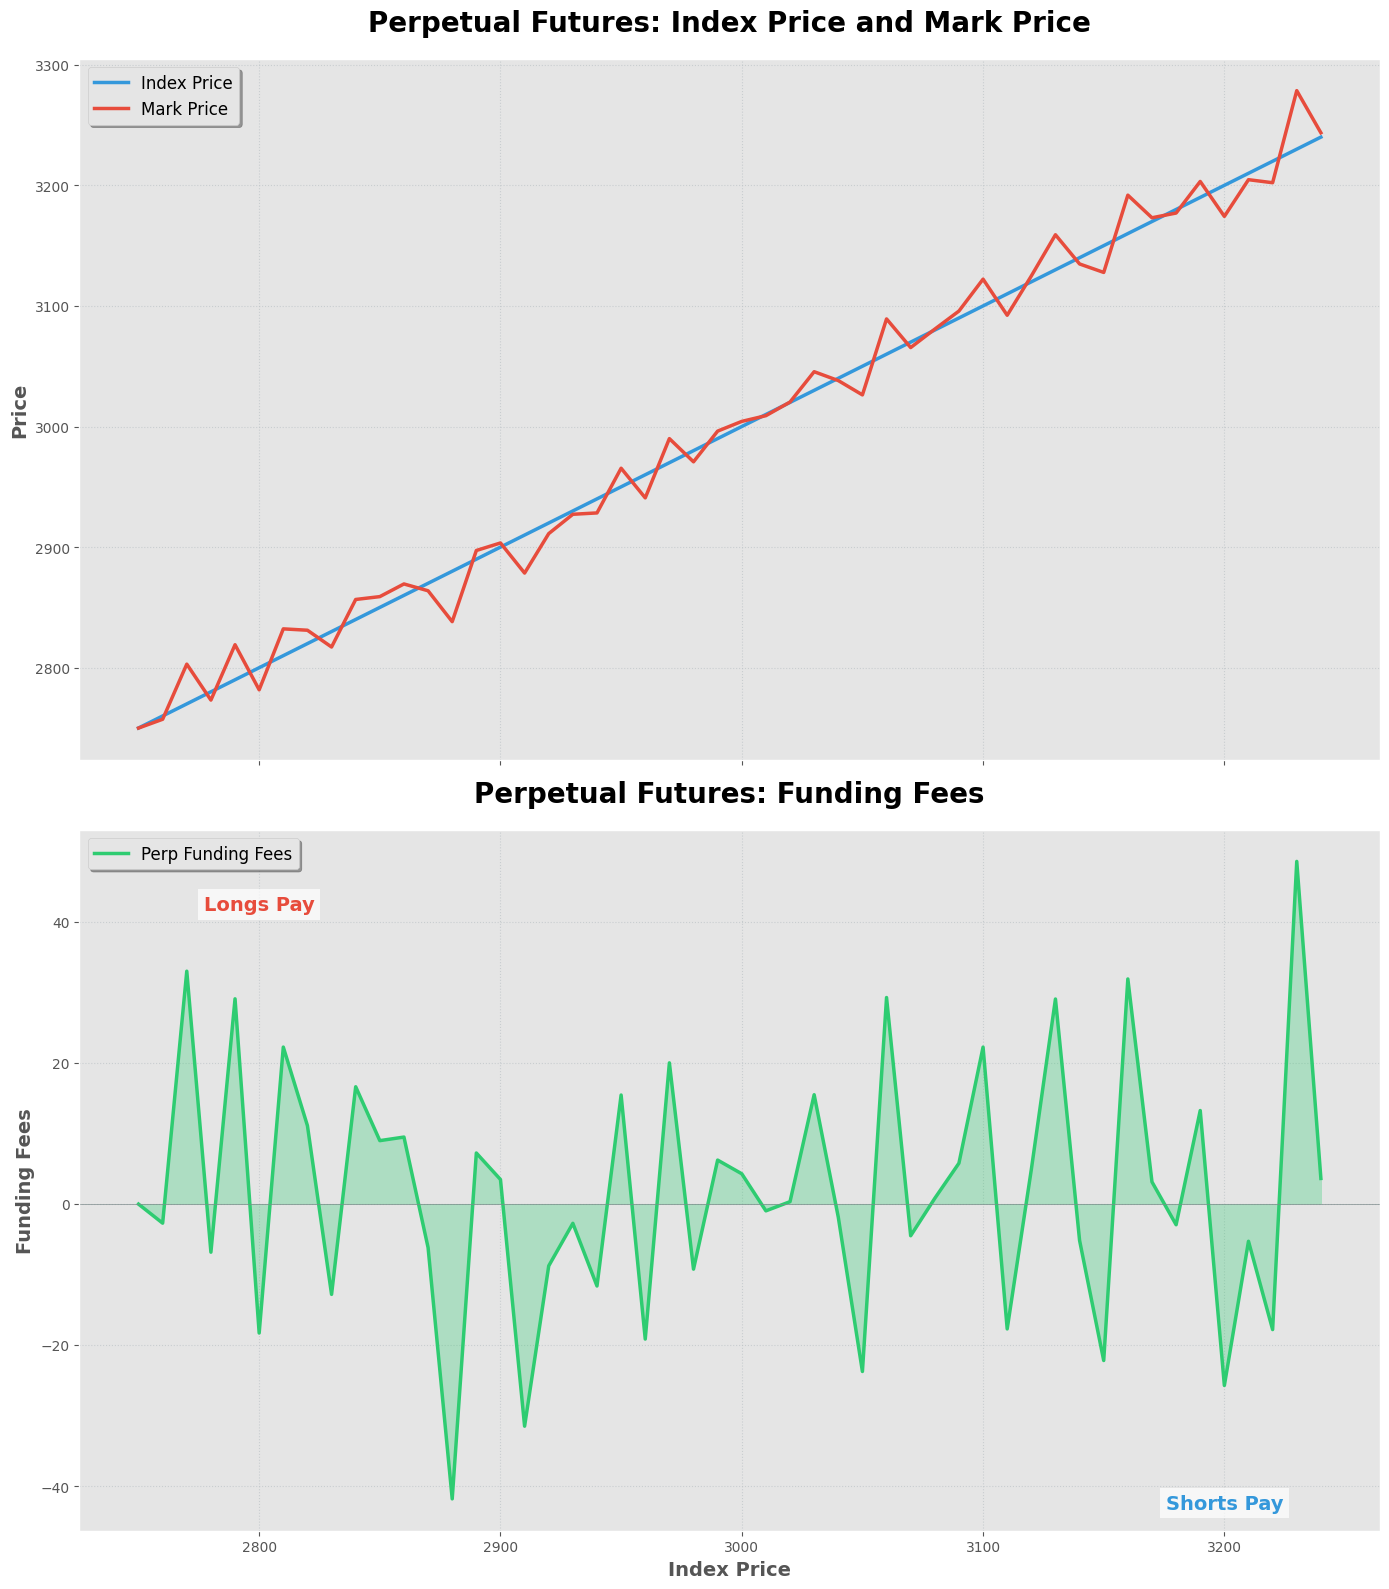

In [25]:
# Set the style
plt.style.use("ggplot")

# Graph 1: Perpetual Futures
fig1, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 16), sharex=True)

# Plot 1: Prices for Perp
ax1.plot(perp["index_price"], perp["index_price"], label="Index Price", color="#3498db", linewidth=2.5)
ax1.plot(perp["index_price"], perp["mark_price"], label="Mark Price", color="#e74c3c", linewidth=2.5)

# Plot 2: Perp Funding Fees
ax2.plot(perp["index_price"], perp["funding_fees"], label="Perp Funding Fees", color="#2ecc71", linewidth=2.5)
ax2.axhline(y=0, color="#7f8c8d", linestyle="-", linewidth=0.5)
ax2.fill_between(perp["index_price"], 0, perp["funding_fees"], alpha=0.3, color="#2ecc71")

# Add "Longs Pay" and "Shorts Pay" labels to perp funding fees plot
y_min, y_max = ax2.get_ylim()
max_abs_funding = max(abs(y_min), abs(y_max))
ax2.text(2800, max_abs_funding * 0.5, "Longs Pay", fontsize=14, ha="center", va="center", color="#e74c3c", fontweight="bold", bbox=dict(facecolor="white", edgecolor="none", alpha=0.7))
ax2.text(3200, -max_abs_funding * 0.5, "Shorts Pay", fontsize=14, ha="center", va="center", color="#3498db", fontweight="bold", bbox=dict(facecolor="white", edgecolor="none", alpha=0.7))

# Customize the plots for Perp
ax1.set_title("Perpetual Futures: Index Price and Mark Price", fontsize=20, fontweight="bold", pad=20)
ax1.set_ylabel("Price", fontsize=14, fontweight="bold")
ax2.set_title("Perpetual Futures: Funding Fees", fontsize=20, fontweight="bold", pad=20)
ax2.set_xlabel("Index Price", fontsize=14, fontweight="bold")
ax2.set_ylabel("Funding Fees", fontsize=14, fontweight="bold")

# Enhance the legends for Perp
for ax in [ax1, ax2]:
    ax.legend(fontsize=12, loc="upper left", fancybox=True, shadow=True)
    ax.grid(True, linestyle=":", alpha=0.7, color="#bdc3c7")

# Adjust the layout and display the Perp plot
plt.tight_layout()
plt.show()

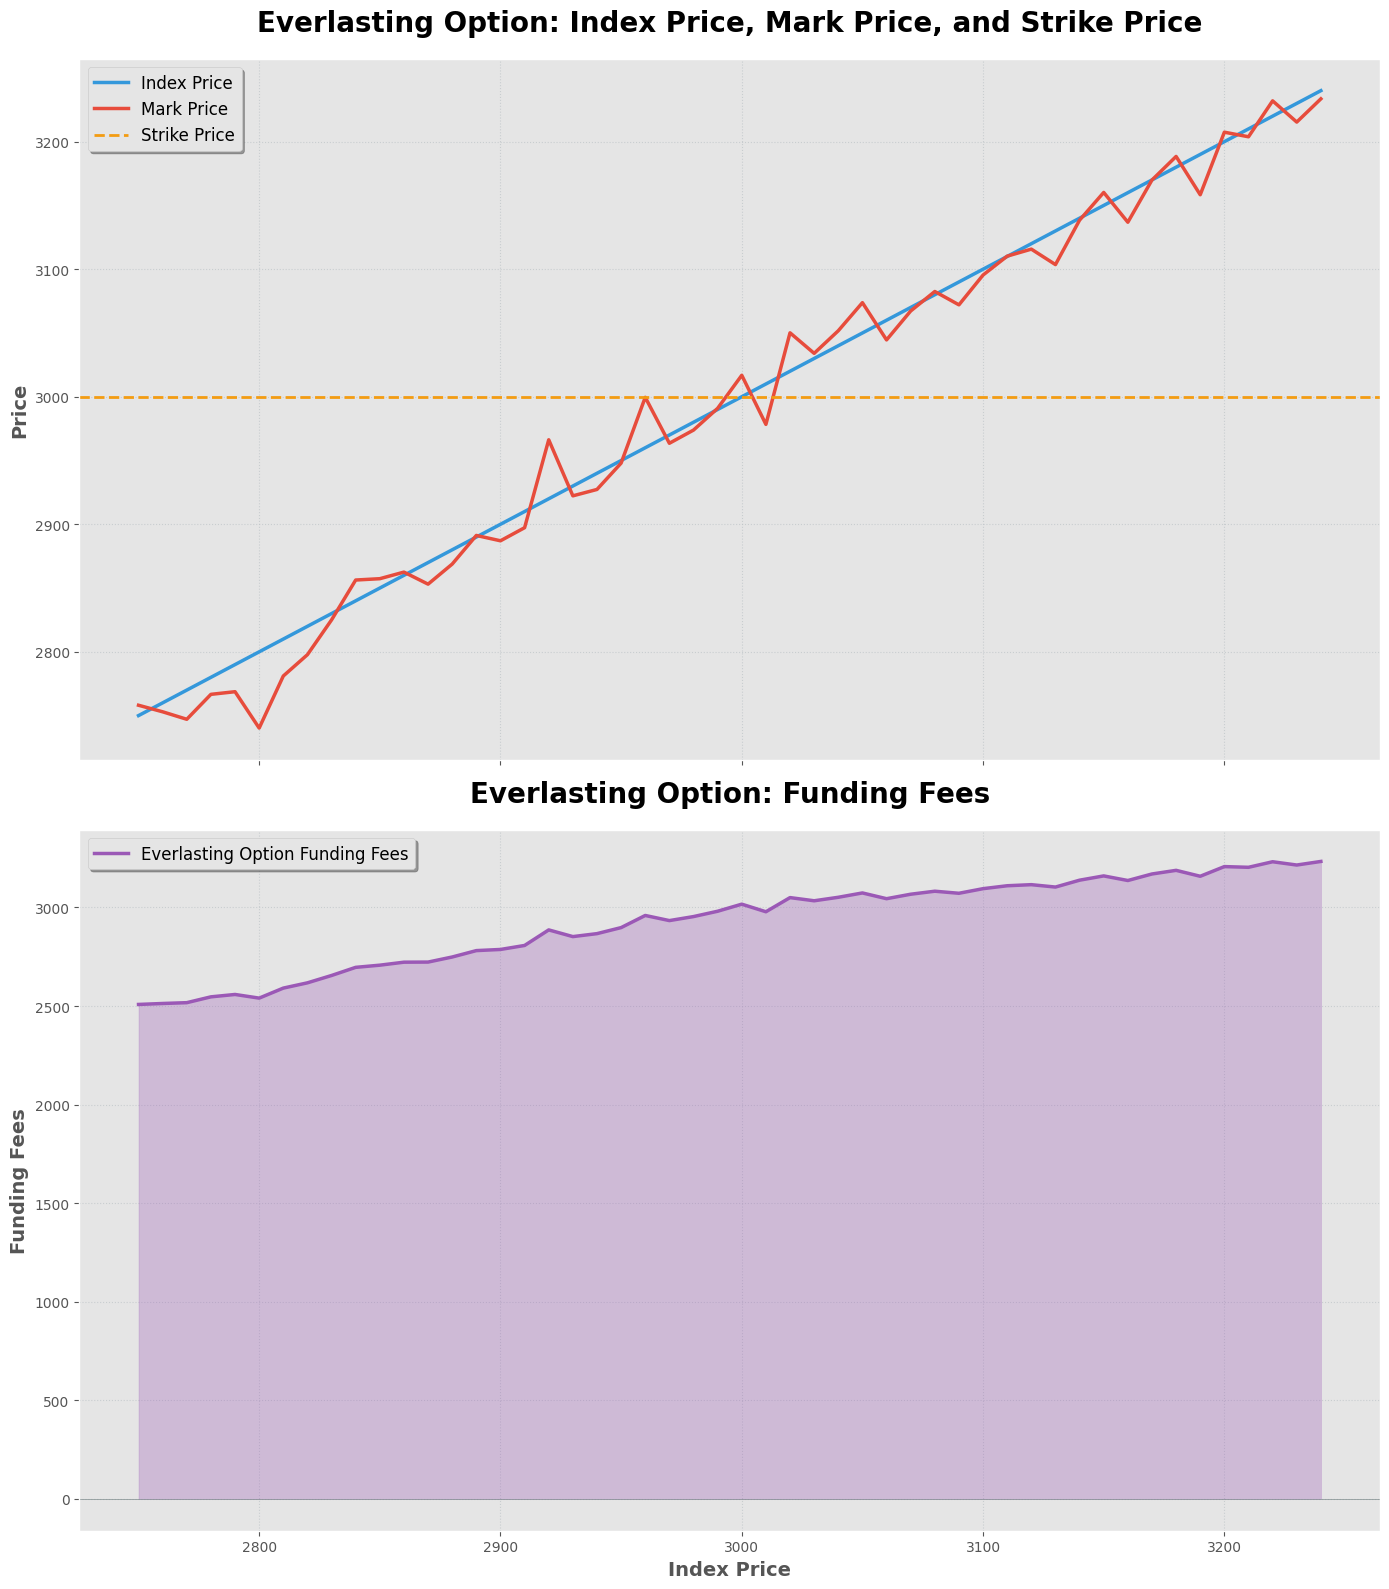

In [23]:
# Graph 2: Everlasting Options
fig2, (ax3, ax4) = plt.subplots(2, 1, figsize=(14, 16), sharex=True)

# Plot 3: Prices for Everlasting Option
ax3.plot(ev_option["index_price"], ev_option["index_price"], label="Index Price", color="#3498db", linewidth=2.5)
ax3.plot(ev_option["index_price"], ev_option["mark_price"], label="Mark Price", color="#e74c3c", linewidth=2.5)
ax3.axhline(y=strike_price, color="#f39c12", linestyle="--", linewidth=2, label="Strike Price")

# Plot 4: Everlasting Option Funding Fees
ax4.plot(ev_option["index_price"], ev_option["funding_fees"], label="Everlasting Option Funding Fees", color="#9b59b6", linewidth=2.5)
ax4.axhline(y=0, color="#7f8c8d", linestyle="-", linewidth=0.5)
ax4.fill_between(ev_option["index_price"], 0, ev_option["funding_fees"], alpha=0.3, color="#9b59b6")

# Customize the plots for Everlasting Option
ax3.set_title("Everlasting Option: Index Price, Mark Price, and Strike Price", fontsize=20, fontweight="bold", pad=20)
ax3.set_ylabel("Price", fontsize=14, fontweight="bold")
ax4.set_title("Everlasting Option: Funding Fees", fontsize=20, fontweight="bold", pad=20)
ax4.set_xlabel("Index Price", fontsize=14, fontweight="bold")
ax4.set_ylabel("Funding Fees", fontsize=14, fontweight="bold")

# Enhance the legends for Everlasting Option
for ax in [ax3, ax4]:
    ax.legend(fontsize=12, loc="upper left", fancybox=True, shadow=True)
    ax.grid(True, linestyle=":", alpha=0.7, color="#bdc3c7")

# Adjust the layout and display the Everlasting Option plot
plt.tight_layout()
plt.show()